<a href="https://colab.research.google.com/github/Tiba-Rocha/DNC-arquivos-legais/blob/main/Estudo_Pandas_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
df = pd.read_csv('/content/pokemon_data.csv', delimiter = ',')
df.head()

In [ ]:
df.columns

In [ ]:
df['Name']

In [ ]:
#Selecionar colunas
df[['Name','Legendary']]

In [ ]:
#Selecionar linhas baseado em indices inteiros
df.iloc[1:4]

In [ ]:
df.iloc[0,1]

In [ ]:
#Percorrer um df linha por linha
for index, row in df.iterrows():
  print(index, row[['Name','Legendary']])


In [ ]:
#Selecionar linhas baseado em string (nomes das colunas)
df.loc[df['Type 1'] == 'Grass']

In [ ]:
df.loc[df['HP'] == 255.000000]

In [ ]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
#Ordenar valores (ascending= crescente, decrescente)
df.sort_values(['HP'], ascending=False)
df.sort_values(['Type 2','HP'], ascending=False)

In [ ]:
#Criar colunas 
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
df.head()

In [ ]:
#Drop uma coluna
df.drop(columns=['Total'], inplace=True)
df.head()

In [ ]:
#Criar coluna de uma forma melhor df.iloc[:, 4:9] [todas as linhas,colunas 4-9]
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.head()

In [ ]:
#pegar os nomes das colunas em uma lista para não precisar escrever uma por uma
cols = list(df.columns)
#Reordenar as colunas
df = df[cols[0:4] + [cols[-1]] + cols[4:12]]
df.head()


In [ ]:
print(cols)

In [ ]:
#Salvar em um arquivo
df.to_excel('new_pokemon_data.xlsx', index = False)

In [ ]:
#Filtrando dados
df.loc[(df['Type 1'] == 'Grass') & (df['Type 2'] == 'Poison')]
#Organizando dados filtrados
df.loc[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Poison') & (df['Legendary'] == True)].sort_values(['HP'], ascending = False) 
df.loc[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Poison') & (df['Attack'] > 100)].sort_values(['HP'], ascending = False) 


In [ ]:
#Salvar em um df novo
water_df = df.loc[((df['Type 1'] == 'Water') & (df['Defense'] >100)) & (df['Attack'] > 100)].sort_values(['HP'], ascending = False) 
# Resetando os indices / deletar a coluna de indices que ficou
#drop=True para deletar a coluna de indices que ficou
water_df = water_df.reset_index(drop=True)
water_df

In [ ]:
#Agrupando por tipo (como parametro média) e ordenando por HP
df_type1 = df.groupby(['Type 1']).mean().sort_values('Attack',ascending=False).reset_index()
df_type1.head()

In [ ]:
#contém string o df.loc[~df['Name'].str.contains('Mega')] vê o que não contém (~)
df.loc[df['Name'].str.contains('Ti')]

In [ ]:
#usando regex para localizar Fire ou Grass / flags=re.I - ignora caps
import re
df.loc[df['Type 1'].str.contains('fire|grass', flags=re.I, regex = True)]

In [ ]:
#Modificar valores com parametros
df.loc[df['Type 1'] == 'Fire', 'Type 1'] = 'Flame'
df.loc[df['Type 1'] == 'Flame']

In [ ]:
df1 = df.loc[df['Total']>500]
df1

In [ ]:
df1['Score'] = df['Attack']*df['Speed']*df['Defense']
df1

In [ ]:
df1.sort_values(['Score'], ascending=False)

In [ ]:
df1.loc[(df['Legendary'] == True) & (df['Generation'] == 1)].sort_values(['Score'], ascending=False)

In [ ]:
df_g = df.groupby(['EDUCATION']).mean().reset_index()
plt.figure(figsize=(10,8))
plt.xlabel(xlabel='sexo')
plt.ylabel(ylabel='crédito')
plt.bar(df_g['EDUCATION'],df_g['valor_credito'], color='Pink');

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel(xlabel='Tipo 1')
plt.ylabel(ylabel='Média de Attack')
plt.xticks(rotation=45, ha='right')
plt.bar(df_type1['Type 1'],df_type1['Attack'],color='Red');

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
sns.barplot(data=df,x='EDUCATION',y='valor_credito', ax=axes[0,0])
sns.barplot(data=df,x='sexo',y='valor_credito', ax=axes[0,1])
sns.barplot(data=df,x='AGE',y='valor_credito', ax=axes[1,0])
sns.barplot(data=df,x='MARRIAGE',y='valor_credito', ax=axes[1,1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

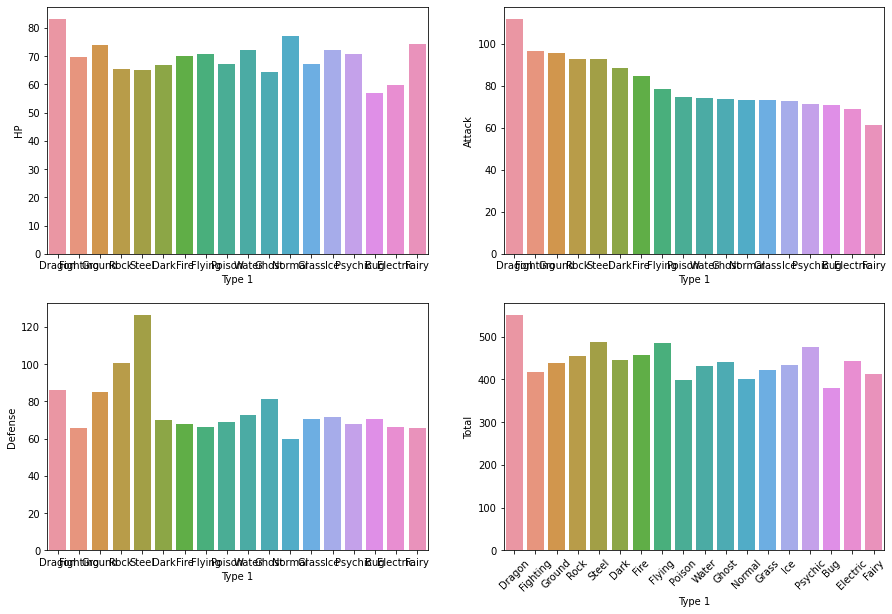

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
sns.barplot(data=df_type1,x='Type 1',y='HP',ax=axes[0,0])
sns.barplot(data=df_type1,x='Type 1',y='Attack',ax=axes[0,1])
sns.barplot(data=df_type1,x='Type 1',y='Defense',ax=axes[1,0])
sns.barplot(data=df_type1,x='Type 1',y='Total',ax=axes[1,1])
plt.xticks(rotation=45)


In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=df_g['EDUCATION'],y=df_g['PAY_0'], marker_color = 'Pink', name ='Grafico Porra!'))
fig1.add_trace(go.Bar(x=df_g['EDUCATION'],y=df_g['PAY_2'], marker_color = 'Red', name ='Grafico Porra!'))
fig1.add_trace(go.Bar(x=df_g['EDUCATION'],y=df_g['PAY_3'], marker_color = 'Blue', name ='Grafico Porra!'))

In [ ]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=df_type1['Type 1'],y=df_type1['HP'],marker_color='Green', name='HP'))
fig1.add_trace(go.Bar(x=df_type1['Type 1'],y=df_type1['Attack'],marker_color='Red', name='Attack'))
fig1.add_trace(go.Bar(x=df_type1['Type 1'],y=df_type1['Defense'],marker_color='Blue', name='Defense'))


In [ ]:
m = np.linspace(0.0,3.0,100)
m

In [ ]:
c1 = np.sin(np.pi*m)

plt.figure(figsize=(10,8))
plt.plot(m,c1)

In [ ]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
df.loc[df['Type 1'] == 'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying', 'Type 1'] = 1
df.loc[df['Type 1'] == 'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying', 'Type 1'] = 1
df.loc[df['Type 1'] == 'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying', 'Type 1'] = 1
df.loc[df['Type 1'] == 'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying', 'Type 1'] = 1


In [ ]:
df.loc[df['Legendary'] == True, 'Legendary'] = 1
df.loc[df['Legendary'] == False, 'Legendary'] = 0
df


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,1


In [ ]:
df_cor = df.drop(['#', 'Name', 'Type 1', 'Type 2'], axis=1)
df_cor.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,45,49,49,65,65,45,1,0
1,60,62,63,80,80,60,1,0
2,80,82,83,100,100,80,1,0
3,80,100,123,122,120,80,1,0
4,39,52,43,60,50,65,1,0


In [ ]:
pd.to_numeric(df_cor['Legendary'])

In [ ]:
df_cor = df_cor.astype(int)
df_cor.corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


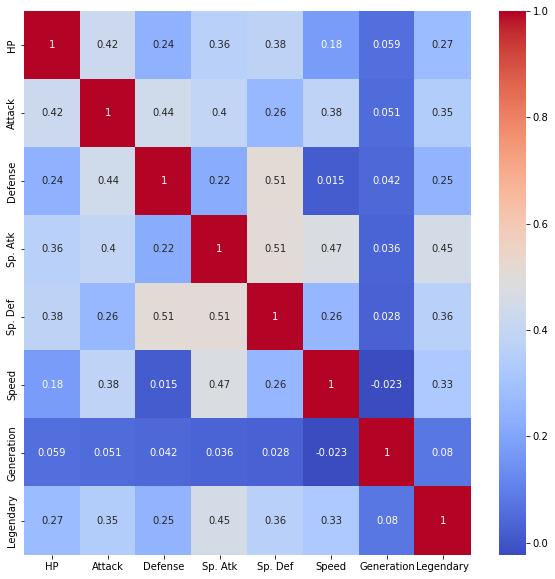

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cor.corr(),annot = True, cmap='coolwarm')


In [ ]:
count = 0
for i in df['Type 1'].unique():
  print(i)
    

In [ ]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
fig = px.violin(df, x='Legendary', y='Attack', box = True)
fig.show()

In [10]:
fig = px.scatter(df, x='Type 1', y='Attack', color='Legendary', size='HP', hover_data=['Name'])
fig.show()

In [12]:
fig.write_html('Pokemons_hover.html')